In [1]:
%pylab inline
import pickle
import scipy

Populating the interactive namespace from numpy and matplotlib


Text(0,0.5,'Distance to target in End Effector Space')

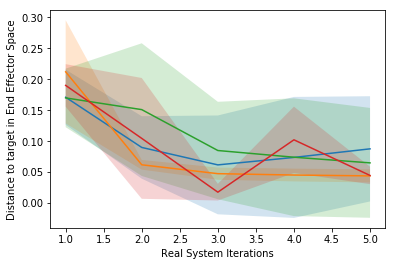

In [77]:
sigmas = [0.0,-1.0,'gaussian','max_ent']
sigmas_error =[[] for k in range(len(sigmas))]
for j,sigma in enumerate(sigmas):
    for seed in range(10,13):
        with open('experiment_data/ilqr_experiment_seed_' + str(seed)+'sigma_'+str(sigma)+'_.p', "rb") as input_file:
            e = pickle.load(input_file) 
            ee_pos_error = np.array([np.linalg.norm(it['ee_pos'][-1,:2] - it['ee_target']) for it in e['runs']])
            sigmas_error[j].append(ee_pos_error)
figure(figsize=(6,4))
colors = ['C0','C1','C2','C3','C4']
for j in range(len(sigmas_error)):
    mean = np.mean(np.array(sigmas_error[j]),axis=0)
    std = np.std(np.array(sigmas_error[j]),axis=0)
    plot(range(1,len(mean)+1),mean,c=colors[j])
    fill_between(range(1,len(mean)+1),mean+std,mean-std,facecolor=colors[j], alpha=0.2)
xlabel('Real System Iterations')
ylabel('Distance to target in End Effector Space')